In [202]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
from rlway import OSRD

In [204]:
OSRD.use_cases

['c1',
 'c1_with_blocks',
 'c1y2',
 'c2x2',
 'c2xx2',
 'c2y13s',
 'c2y1sy2sy1s',
 'c2y1y2',
 'c2z2z2',
 'c3y1',
 'c3yy1yy3',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

In [205]:
use_case='c1_with_blocks'
sim = OSRD(use_case=use_case, dir='tmp')

[11:13:44,900] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[11:13:44,940] [INFO]              [FullInfra] parsing infra
[11:13:45,010] [INFO]              [FullInfra] adaptation to kotlin
[11:13:45,043] [INFO]              [FullInfra] loading signals
[11:13:45,052] [INFO]              [FullInfra] building blocks
[11:13:45,059] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[11:13:45,075] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.30
[11:13:45,140] [DEBUG]             [Allowance] computing range n°1
[11:13:45,142] [DEBUG]             [Allowance]   computing section n°1
[11:13:45,143] [DEBUG]             [Allowance]   target time = 310.84094999999996
[11:13:45,143] [DEBUG]             [Allowance]     starting attempt 1
[11:13:45,144] [DEBUG]             [Allowance]     envelope time 518.958
[11:13:45,145] [DEBUG]             [Allowance]     starting attempt 2
[11:13:45,145] [DEBUG]             [Allo

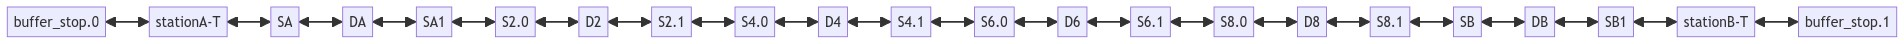

In [206]:
sim.draw_infra_points()

In [207]:
sim.space_time_chart_plotly(1, points_to_show=['switch','station', 'signal'], eco_or_base='base')

In [208]:
from rlway.schedules import schedule_from_osrd, Schedule

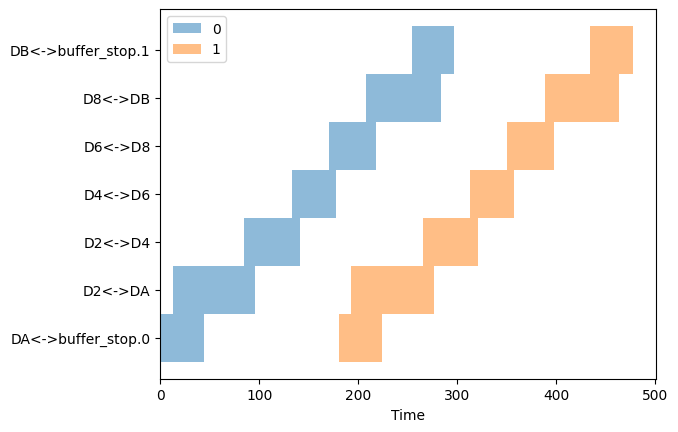

In [209]:
s = schedule_from_osrd(sim, eco_or_base='base')
ax = s.plot()
# ax.invert_yaxis()
# ax.legend('')

In [226]:
import copy

def with_spacing(
    self: Schedule,
    n_blocks_between_trains: int = 1,
) -> Schedule:

    new_schedule = copy.deepcopy(self)

    for train in self.trains:
        zones = self.trajectory(train)
        for zone_idx, zone in enumerate(zones[:-1]):
            next_zone = zones[
                zone_idx+n_blocks_between_trains
                if zone_idx < len(zones) - n_blocks_between_trains
                else -1
            ]
            new_schedule._df.loc[zone, (train, 'e')] =\
                    self._df.loc[next_zone, (train, 'e')]

    return new_schedule

<Axes: xlabel='Time'>

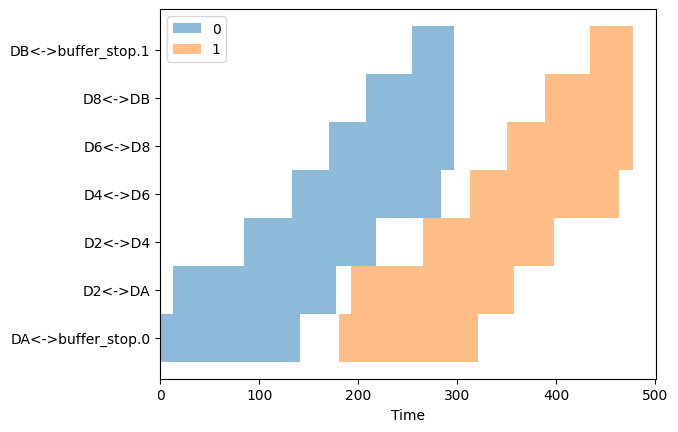

In [229]:
with_spacing(s, n_blocks_between_trains=2).plot()

In [212]:
from rlway.schedules.zone_info import step_type, step_has_fixed_duration

In [213]:
step_type(sim)

,0,1
DA<->buffer_stop.0,station,station
D2<->DA,signal,signal
D2<->D4,signal,signal
D4<->D6,signal,signal
D6<->D8,signal,signal
D8<->DB,signal,signal
DB<->buffer_stop.1,station,station


<Axes: xlabel='Time'>

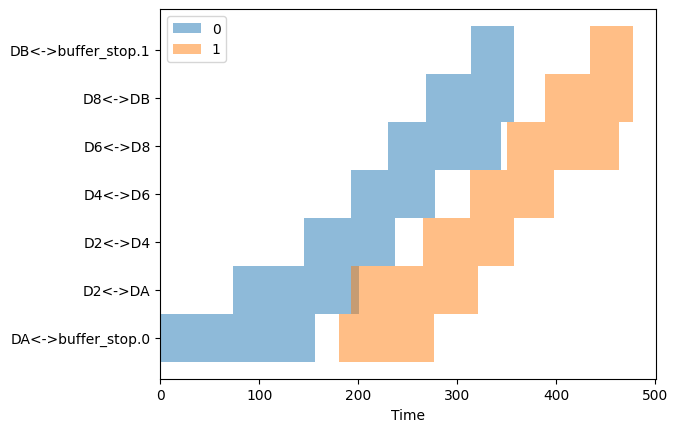

In [234]:
with_spacing(s.add_delay(0, 'DA<->buffer_stop.0', 60)).plot()